In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cols = ['Id','Entity','target','Review']

In [3]:
df1= pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Project and code\Intership\Internship Prodigy\Task 4\archive (1)\twitter_training.csv",names = cols)

In [4]:
df2= pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Project and code\Intership\Internship Prodigy\Task 4\archive (1)\twitter_validation.csv",names = cols)

In [5]:
df = pd.concat([df1,df2])

In [6]:
df.sample(10)

,Id,Entity,target,Review
48740,5967,HomeDepot,Irrelevant,I don't say this information is completely fal...
10895,13073,Xbox(Xseries),Neutral,The Source Behind All About All Series Update/...
73053,8915,Nvidia,Negative,Why am always this Ruthless and ˈkʌtθrəʊt?.. b...
1875,2729,Borderlands,Neutral,back on my borderlands shit tho hi miss sasha ...
13620,8737,NBA2K,Negative,I genuinely hate this new @NBA2K shot meter ca...
19376,12518,WorldOfCraft,Neutral,"Check out this item I just received! [Ashraf, ..."
66702,7022,johnson&johnson,Irrelevant,Yall are out ya rabbit ass mind of you think i...
21053,4003,CS-GO,Irrelevant,Bodyy is back with LDLC OL. He wanted to play ...
59693,3431,Facebook,Negative,The best thing I could’ve chosen for my
29140,612,ApexLegends,Negative,@PlayApex fix loba with out that being not abl...


In [7]:
df.shape

(75682, 4)

In [8]:
df.duplicated().value_counts()

False    72465
True      3217
Name: count, dtype: int64

In [9]:
df= df.drop_duplicates()

In [10]:
df.duplicated().value_counts()

False    72465
Name: count, dtype: int64

In [11]:
df.isnull().sum()

Id          0
Entity      0
target      0
Review    326
dtype: int64

In [12]:
df= df.dropna()

In [13]:
df.isnull().sum()

Id        0
Entity    0
target    0
Review    0
dtype: int64

In [14]:
df.head()

,Id,Entity,target,Review
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [15]:
total_target= df['target'].value_counts().reset_index()
total_target

,target,count
0,Negative,21790
1,Positive,19846
2,Neutral,17879
3,Irrelevant,12624


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72139 entries, 0 to 996
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      72139 non-null  int64 
 1   Entity  72139 non-null  object
 2   target  72139 non-null  object
 3   Review  72139 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


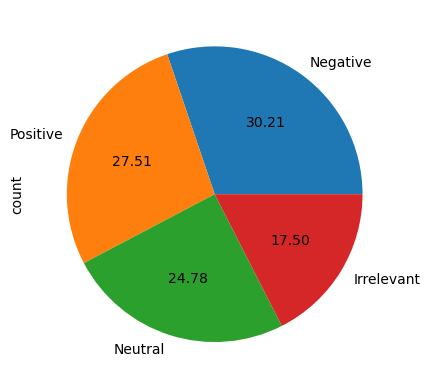

In [17]:
df['target'].value_counts().plot(kind='pie',autopct='%0.2f')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5772\2245563067.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_target,x='target',y='count',palette='bright')


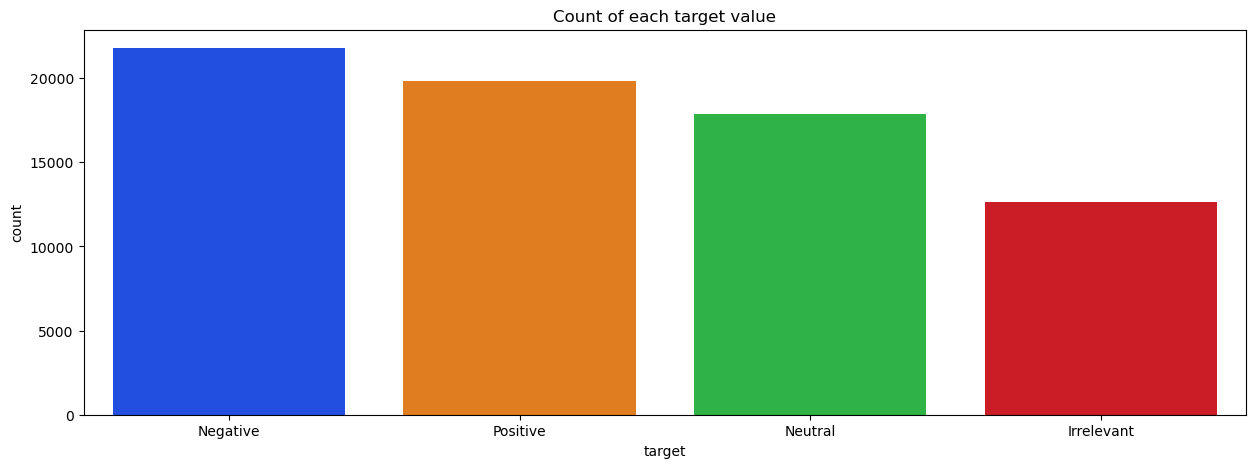

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(data=total_target,x='target',y='count',palette='bright')
plt.title("Count of each target value")    
plt.show()

In [19]:
df['Review'][1]

'I am coming to the borders and I will kill you all,'

In [20]:
!pip install emoji

# Feature Engineering

In [23]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer
import emoji
import re
from wordcloud import WordCloud
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
df.head()

,Id,Entity,target,Review
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [25]:
df['char_count'] = df['Review'].apply(len)

In [26]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [27]:
df['word_count'] = df['Review'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df['sent_count'] = df['Review'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df= df.drop(columns=['Id','Entity'],axis=1)

In [30]:
df['Review']= df['Review'].apply(lambda x:emoji.demojize(x))

In [31]:
df

,target,Review,char_count,word_count,sent_count
0,Positive,im getting on borderlands and i will murder yo...,53,11,1
1,Positive,I am coming to the borders and I will kill you...,51,13,1
2,Positive,im getting on borderlands and i will kill you ...,50,11,1
3,Positive,im coming on borderlands and i will murder you...,51,11,1
4,Positive,im getting on borderlands 2 and i will murder ...,57,13,1
...,...,...,...,...,...
988,Neutral,:heart_suit: Suikoden 2\n:keycap_1: Alex Kidd ...,109,23,1
989,Positive,Thank you to Matching funds Home Depot RW paym...,169,26,2
991,Neutral,Late night stream with the boys! Come watch so...,197,30,3
995,Irrelevant,:star: Toronto is the arts and culture capital...,281,54,3


# Text Preprocessing
lowerCase
Remove punctuation
Remove stopword
steamming

In [33]:
df['Review'] = df['Review'].str.lower()

In [34]:
import string

exclude = string.punctuation

def remove_puch(text):
    return text.translate(str.maketrans('', '', exclude))



In [35]:
df['Review'] = df['Review'].apply(remove_puch)

In [36]:
df

,target,Review,char_count,word_count,sent_count
0,Positive,im getting on borderlands and i will murder yo...,53,11,1
1,Positive,i am coming to the borders and i will kill you...,51,13,1
2,Positive,im getting on borderlands and i will kill you all,50,11,1
3,Positive,im coming on borderlands and i will murder you...,51,11,1
4,Positive,im getting on borderlands 2 and i will murder ...,57,13,1
...,...,...,...,...,...
988,Neutral,heartsuit suikoden 2\nkeycap1 alex kidd in mir...,109,23,1
989,Positive,thank you to matching funds home depot rw paym...,169,26,2
991,Neutral,late night stream with the boys come watch som...,197,30,3
995,Irrelevant,star toronto is the arts and culture capital o...,281,54,3


In [39]:
def remove_stopwords(text):
    if text is None:
        return ""
    stop_words = set(stopwords.words('english'))
    words = text.split()
    return " ".join([w for w in words if w not in stop_words])
    
  

In [40]:
df['Review'] = df['Review'].apply(remove_stopwords)

In [77]:
df

,target,Review,char_count,word_count,sent_count
0,Positive,im getting borderlands murder,53,11,1
1,Positive,coming borders kill,51,13,1
2,Positive,im getting borderlands kill,50,11,1
3,Positive,im coming borderlands murder,51,11,1
4,Positive,im getting borderlands 2 murder,57,13,1
...,...,...,...,...,...
988,Neutral,heartsuit suikoden 2 keycap1 alex kidd miracle...,109,23,1
989,Positive,thank matching funds home depot rw payment 215...,169,26,2
991,Neutral,late night stream boys come watch warzone runs...,197,30,3
995,Irrelevant,star toronto arts culture capital canada it’s ...,281,54,3


In [81]:
ps= PorterStemmer()

In [83]:
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [85]:
df['Review'] = df['Review'].apply(stem_words)

In [90]:
df

,target,Review,char_count,word_count,sent_count
0,Positive,im get borderland murder,53,11,1
1,Positive,come border kill,51,13,1
2,Positive,im get borderland kill,50,11,1
3,Positive,im come borderland murder,51,11,1
4,Positive,im get borderland 2 murder,57,13,1
...,...,...,...,...,...
988,Neutral,heartsuit suikoden 2 keycap1 alex kidd miracl ...,109,23,1
989,Positive,thank match fund home depot rw payment 215545 ...,169,26,2
991,Neutral,late night stream boy come watch warzon run st...,197,30,3
995,Irrelevant,star toronto art cultur capit canada it’ wonde...,281,54,3


EDA

In [93]:
# In this we going to find out the positive , negative and netural word in the dataset

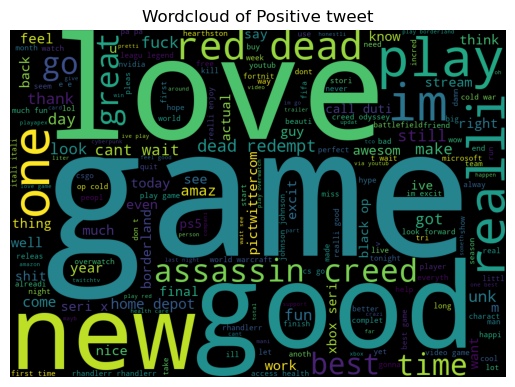

In [99]:
wc = WordCloud(width=1000,height=700,min_font_size=10,background_color='black')
positive= wc.generate(df[df['target']=='Positive']['Review'].str.cat(sep=" "))
plt.title('Wordcloud of Positive tweet')
plt.axis('off')
plt.imshow(positive)
plt.show()
               

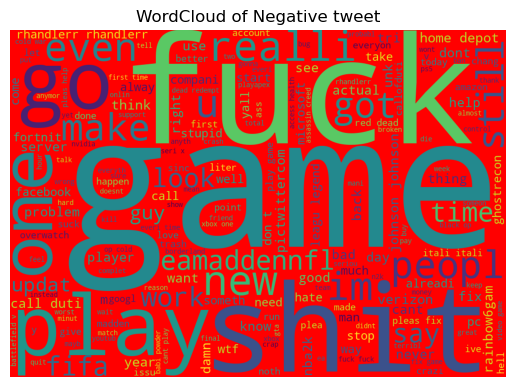

In [105]:
#Now for negative 
wc= WordCloud(width=1000,height=700,min_font_size=10,background_color='Red')
negative= wc.generate(df[df['target']=='Negative']['Review'].str.cat(sep=" "))
plt.title('WordCloud of Negative tweet')
plt.axis('off')
plt.imshow(negative)
plt.show()

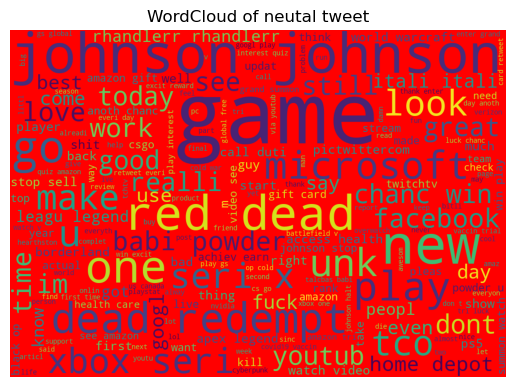

In [111]:
#Now for neutral
wc= WordCloud(width=1000,height=700,min_font_size=10,background_color='Red')
neutral= wc.generate(df[df['target']=='Neutral']['Review'].str.cat(sep=" "))
plt.title('WordCloud of neutal tweet')
plt.axis('off')
plt.imshow(neutral)
plt.show()

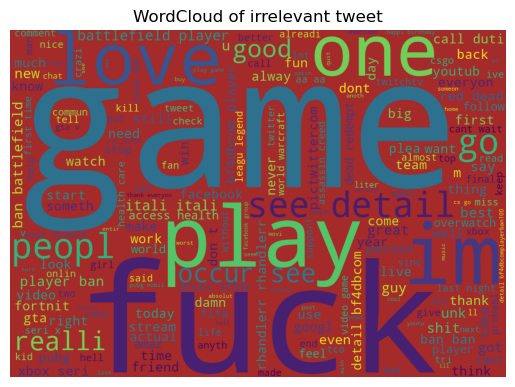

In [113]:
#Now for neutral
wc= WordCloud(width=1000,height=700,min_font_size=10,background_color='Brown')
irrelevant= wc.generate(df[df['target']=='Irrelevant']['Review'].str.cat(sep=" "))
plt.title('WordCloud of irrelevant tweet')
plt.axis('off')
plt.imshow(irrelevant)
plt.show()

In [115]:
# most common word in poditive and negative
positive =[]
for i in df[df['target']=='Positive']['Review'].tolist():
    for word in i.split():
        positive.append(word)

In [117]:
len(positive)

204598

In [121]:
df.duplicated().value_counts()

False    69138
True      3001
Name: count, dtype: int64

In [123]:
df= df.drop_duplicates()

In [125]:
df.duplicated().value_counts()

False    69138
Name: count, dtype: int64

In [129]:
# most common word in positive and negative
positive =[]
for i in df[df['target']=='Positive']['Review'].tolist():
    for word in i.split():
        positive.append(word)

In [131]:
len(positive)

202329

In [133]:
# most common word in negative
Negative =[]
for i in df[df['target']=='Negative']['Review'].tolist():
    for word in i.split():
        Negative.append(word)

In [137]:
len(Negative)

252747

C:\Users\DELL\AppData\Local\Temp\ipykernel_5772\3356200082.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x,y=y,palette='rainbow')


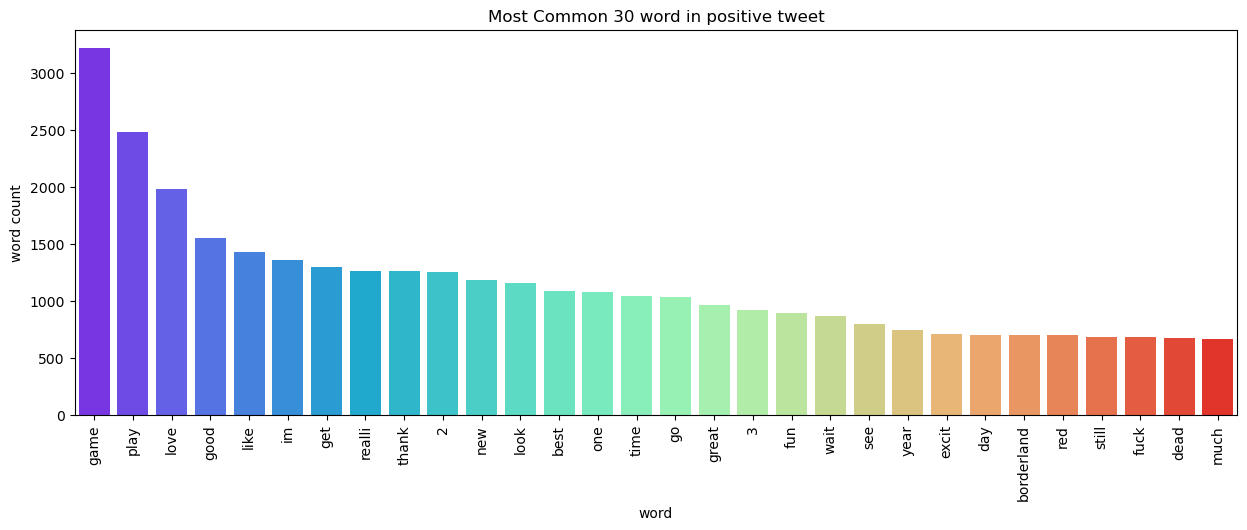

In [149]:
# 30 most common word from positive
plt.figure(figsize=(15,5))
x= pd.DataFrame(Counter(positive).most_common(30))[0]
y=pd.DataFrame(Counter(positive).most_common(30))[1]
sns.barplot(x=x,y=y,palette='rainbow')
plt.xlabel('word')
plt.ylabel('word count')
plt.title('Most Common 30 word in positive tweet')
plt.xticks(rotation=90)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5772\1966039795.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x,y=y,palette='rainbow')


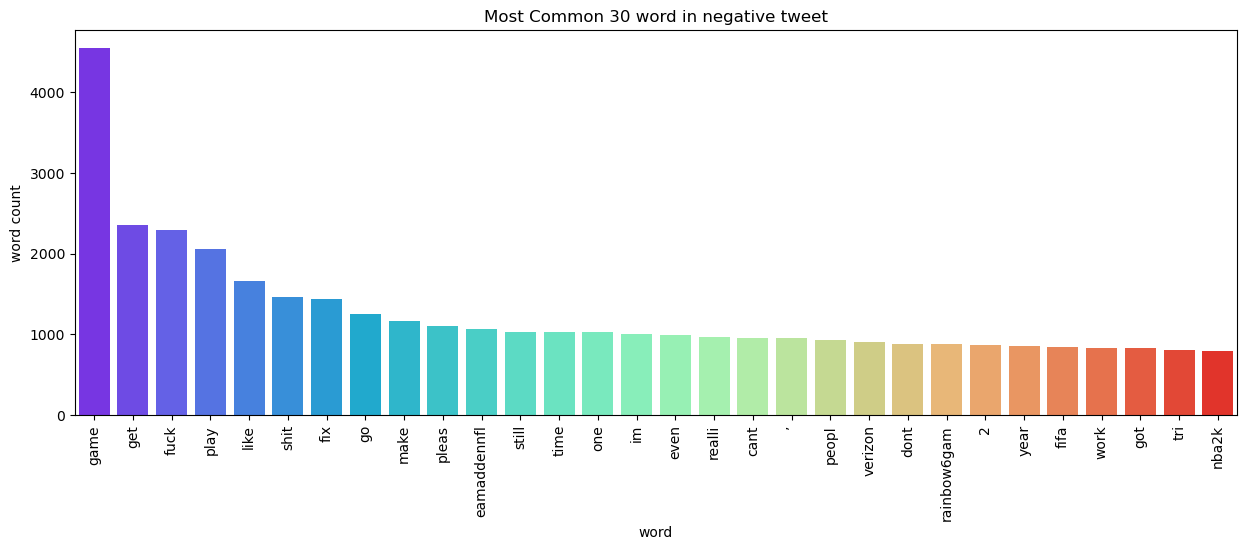

In [157]:
# 30 most common word from negative
plt.figure(figsize=(15,5))
x= pd.DataFrame(Counter(Negative).most_common(30))[0]
y=pd.DataFrame(Counter(Negative).most_common(30))[1]
sns.barplot(x=x,y=y,palette='rainbow')
plt.xlabel('word')
plt.ylabel('word count')
plt.title('Most Common 30 word in negative tweet')
plt.xticks(rotation=90)
plt.show()

In [169]:
neutral =[]
for i in df[df['target']=='Neutral']['Review'].tolist():
    for word in i.split():
        neutral.append(word)

In [171]:
len(neutral)

218784

C:\Users\DELL\AppData\Local\Temp\ipykernel_5772\835850857.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x,y=y,palette='rainbow')


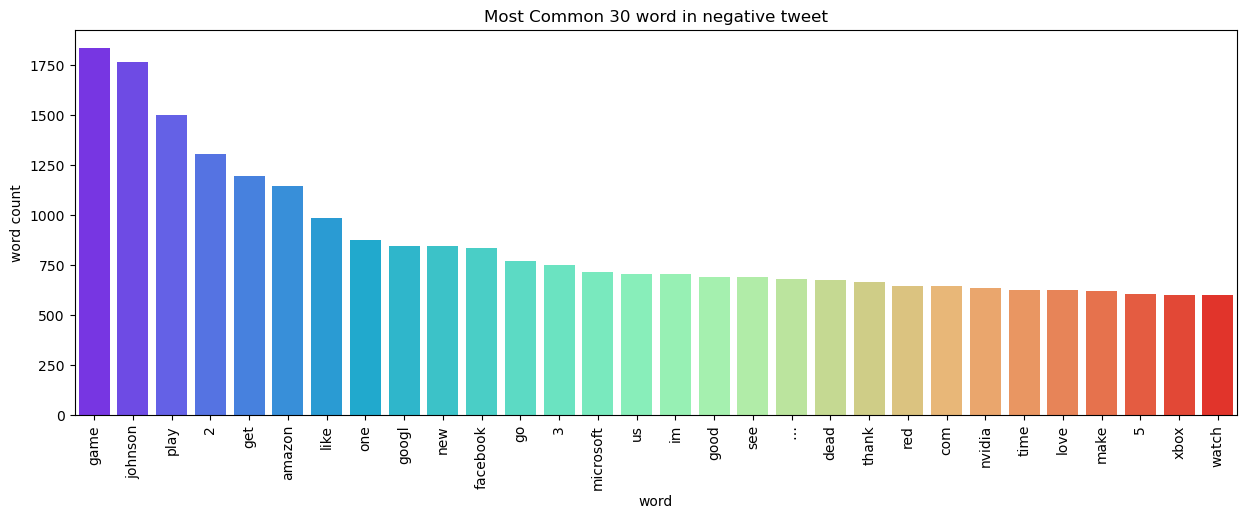

In [173]:
# 30 most common word from neutral
plt.figure(figsize=(15,5))
x= pd.DataFrame(Counter(neutral).most_common(30))[0]
y=pd.DataFrame(Counter(neutral).most_common(30))[1]
sns.barplot(x=x,y=y,palette='rainbow')
plt.xlabel('word')
plt.ylabel('word count')
plt.title('Most Common 30 word in negative tweet')
plt.xticks(rotation=90)
plt.show()

In [175]:
irrelevant =[]
for i in df[df['target']=='Irrelevant']['Review'].tolist():
    for word in i.split():
        irrelevant.append(word)

In [177]:
len(irrelevant)

143414

C:\Users\DELL\AppData\Local\Temp\ipykernel_5772\2054615023.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x,y=y,palette='rainbow')


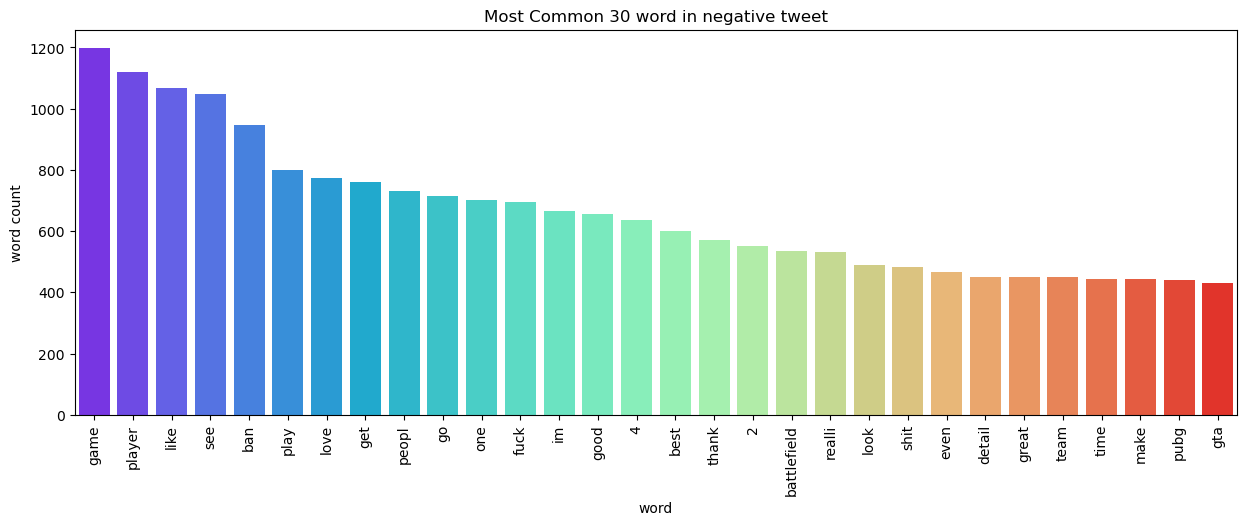

In [179]:
# 30 most common word from irrelevant
plt.figure(figsize=(15,5))
x= pd.DataFrame(Counter(irrelevant).most_common(30))[0]
y=pd.DataFrame(Counter(irrelevant).most_common(30))[1]
sns.barplot(x=x,y=y,palette='rainbow')
plt.xlabel('word')
plt.ylabel('word count')
plt.title('Most Common 30 word in negative tweet')
plt.xticks(rotation=90)
plt.show()

In [181]:
## Label Encoding

In [185]:
df['Target'] = df['target'].replace({'Positive':1,'Negative':0,'Neutral':2,'Irrelevant':3})

C:\Users\DELL\AppData\Local\Temp\ipykernel_5772\2978005784.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Target'] = df['target'].replace({'Positive':1,'Negative':0,'Neutral':2,'Irrelevant':3})
C:\Users\DELL\AppData\Local\Temp\ipykernel_5772\2978005784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['target'].replace({'Positive':1,'Negative':0,'Neutral':2,'Irrelevant':3})


In [187]:
df

,target,Review,char_count,word_count,sent_count,Target
0,Positive,im get borderland murder,53,11,1,1
1,Positive,come border kill,51,13,1,1
2,Positive,im get borderland kill,50,11,1,1
3,Positive,im come borderland murder,51,11,1,1
4,Positive,im get borderland 2 murder,57,13,1,1
...,...,...,...,...,...,...
988,Neutral,heartsuit suikoden 2 keycap1 alex kidd miracl ...,109,23,1,2
989,Positive,thank match fund home depot rw payment 215545 ...,169,26,2,1
991,Neutral,late night stream boy come watch warzon run st...,197,30,3,2
995,Irrelevant,star toronto art cultur capit canada it’ wonde...,281,54,3,3


In [191]:
df= df.drop(columns=['target'])

In [193]:
df

,Review,char_count,word_count,sent_count,Target
0,im get borderland murder,53,11,1,1
1,come border kill,51,13,1,1
2,im get borderland kill,50,11,1,1
3,im come borderland murder,51,11,1,1
4,im get borderland 2 murder,57,13,1,1
...,...,...,...,...,...
988,heartsuit suikoden 2 keycap1 alex kidd miracl ...,109,23,1,2
989,thank match fund home depot rw payment 215545 ...,169,26,2,1
991,late night stream boy come watch warzon run st...,197,30,3,2
995,star toronto art cultur capit canada it’ wonde...,281,54,3,3


In [207]:
!pip install pipeline
!pip install sklearn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [217]:
X= df['Review']
y=df['Target']


In [219]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [223]:
model1_pipeline = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('rfc',RandomForestClassifier(random_state=42))])

In [231]:
model1_pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(random_state=42))])

In [235]:
y_pred = model1_pipeline.predict(X_test)
accuracy_score(y_test,y_pred)

0.9167630893838589

In [237]:
mnb_pipeline = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('mnb',MultinomialNB())
])

In [239]:
mnb_pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('mnb', MultinomialNB())])

In [241]:
y_pred = mnb_pipeline.predict(X_test)
accuracy_score(y_test,y_pred)

0.7066820943014174

In [247]:
lr_pipeline = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('lr',LogisticRegression())
])

In [249]:
lr_pipeline.fit(X_train,y_train)

C:\Users\DELL\anaconda3\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lr', LogisticRegression())])

In [251]:
y_pred = lr_pipeline.predict(X_test)
accuracy_score(y_test,y_pred)

0.7642464564651432

In [253]:
## As Per this data the best result we get that from RandomForest Classifier

In [257]:
import pickle
pickle.dump(model1_pipeline,open('RFC_Model','wb'))